# 5　k-means法
似ているデータポイントをまとめて組にしていく教師なし学習を一般に**クラスタリング**と言います。また、このとき，作られた組をクラスタといいます。
たとえば、

『顧客の属性や購買行動に関するデータをクラスタリングした結果、顧客は3つのクラスタにわけられることがわかった。そこで、それぞれのクラスタごとに、有効と考えられる施策を打った．』

のような事例はクラスタリングの応用例といえます。

## A　分割最適型クラスタリング

k-means法は分割最適型クラスタリングと呼ばれるクラスタリング手法の一つです。分割型クラスタリングは、事前にクラスタの良さを測る関数を準備しておいて、その関数の値を最小化するようなクラスタリングを求める手法です。

## B　k-means法のアルゴリズム
k-means法はクラスター数$K$を**事前に決めておき**、データポイント全体を$K$個のクラスターに分割する手法の一つです。特にクラスターは
$$L(C_1,\cdots,C_K) = \sum_{k=1}^{n}\sum_{i\in C_k}||x_i-\bar{x}_k||^2$$
が最小になるようなクラスター$C_1,\cdots,C_K$を決定します。なお、各クラスターの重心のことをセントロイドと言います。この最適化問題は一般にNP困難であるため、一般には以下のようなヒューリスティクスによる最適化アルゴリズムが用いられます。

1. ランダムに各データポイントをクラスターに割り振る。
2. 以下の操作を繰り返す。
    - 各クラスターの重心（平均値）を求め、各データポイントからの距離を求める。
    - 各データポイントを最も近い重心に対応するクラスタに振り分け直す。


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# デモデータの生成
cluster_0 = np.random.multivariate_normal([-2, -2], [[1, 0], [0, 1]], 100)
cluster_1 = np.random.multivariate_normal([2, 2], [[1, 0], [0, 1]], 100)
X = np.r_[cluster_0, cluster_1]
 
# 散布図
plt.scatter(X[:,0], X[:,1])
plt.show()

このデータを、クラスター数K=2のk-means法のアルゴリズムによってクラスタリングする様子を見ていきます。

**step 1.** 各データポイントをランダムに2つのクラスターに割り振ります。

In [ ]:
# ランダムにクラスター(culster = 0 or 1)に割り振る
y = np.random.binomial(n = 1, p = 0.5, size = 200)    # 割り振り
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

**step 2.** 各クラスターの重心を計算して、散布図上に図示してみましょう。

In [ ]:
import pandas as pd
center = pd.DataFrame(X, columns = ["X1", "X2"]).assign(y = y).groupby(y).mean()
center

In [ ]:
plt.scatter(X[:,0], X[:,1], c = y)


plt.scatter(center["X1"][0],center["X2"][0] , s = 100, marker="*", c="red")
plt.scatter(center["X1"][1],center["X2"][1], s = 100, marker="*", c="blue")
plt.show()

**step 3.** 各データポイントの重心からの近さを2乗距離で計算します。この結果をもとに各データポイントのクラスターを近いほうの重心に対応するクラスターに更新します。

In [ ]:
# クラスターの重心をnumpy配列で抽出する。
center_cluster_0 = center.loc[0, ["X1", "X2"]].values
center_cluster_1 = center.loc[1, ["X1", "X2"]].values

# 各データポイントについてクラスターからの2乗距離を計算する。
dist_cluster_0 = (X[:, 0].reshape(200) - center_cluster_0[0])**2 + (X[:, 1].reshape(200) - center_cluster_0[1])**2
dist_cluster_1 = (X[:, 0].reshape(200) - center_cluster_1[0])**2 + (X[:, 1].reshape(200) - center_cluster_1[1])**2
new_cluster_id = dist_cluster_0 < dist_cluster_1

# 可視化
plt.scatter(X[:,0], X[:,1], c = new_cluster_id)
plt.show()

In [ ]:
# 中心点を計算
center_0 = X[dist_cluster_0 < dist_cluster_1,:].mean(axis=0).reshape(1,2)
center_1 = X[dist_cluster_0 > dist_cluster_1,:].mean(axis=0).reshape(1,2)

In [ ]:
# 可視化
plt.scatter(X[:,0], X[:,1], c = new_cluster_id, alpha=0.5)

plt.scatter(center_0[0,0], center_0[0,1], s = 100, marker="*", c="red")
plt.scatter(center_1[0,0], center_1[0,1], s = 100, marker="*", c="blue")

plt.show()

<br>

#### sklearnによる実行


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 2, max_iter=300)
km.fit(X)

In [ ]:
cluster_km = km.predict(X)

In [ ]:
plt.scatter(X[:,0], X[:,1], c = km.predict(X))

## C　k-means法の注意点
k-means法を使用するときの注意点として次の2つが挙げられます。

 * 散らばりの大きい変数の影響を受ける
 * クラスターの大きさが不均一のときうまくいかない(クラスターの大きさ＝サンプルサイズ)

### 散らばりの大きい変数の影響を受ける
上で扱った乱数データの第1変数の分散を10に変更したデータに対して、k-means法を適用してみましょう。

In [ ]:
# デモデータの生成
cluster_0 = np.random.multivariate_normal([-2, -2], [[10, 0], [0, 1]], 100)
cluster_1 = np.random.multivariate_normal([2, 2], [[10, 0], [0, 1]], 100)
X = np.r_[cluster_0, cluster_1]
 
# 散布図
plt.scatter(X[:,0], X[:,1])
plt.show()

In [ ]:
# k-means法によるクラスタリング
kmeans = KMeans(n_clusters = 2, max_iter = 100)
kmeans.fit(X)
cluster_kmeans = kmeans.predict(X)

center_0 = X[cluster_kmeans==0].mean(axis=0)
center_1 = X[cluster_kmeans==1].mean(axis=0)

plt.scatter(X[:,0], X[:,1], c = cluster_kmeans)

plt.scatter(center_0[0], center_0[1], s = 100, marker="*", c="red")
plt.scatter(center_1[0], center_1[1], s = 100, marker="*", c="black")

plt.scatter(-2,-2, s = 125, marker="D", c="red")
plt.scatter(2, 2, s = 125, marker="D", c="black")

plt.show()

### サンプルサイズの不均一性
また、k-means法は各データポイントのサンプルサイズがおおよそ同じであるという仮定を暗に置いています。実際、以下のスクリプトを実行してみてください。

In [ ]:
# デモデータの生成
cluster_0 = np.random.multivariate_normal([-2, -2], [[1, 0], [0, 1]], 100)
cluster_1 = np.random.multivariate_normal([2, 2], [[1, 0], [0, 1]], 100)
cluster_2 = np.random.multivariate_normal([2, -2], [[1, 0], [0, 1]], 100)
X = np.r_[cluster_0, cluster_1, cluster_2]
 
# 散布図
plt.scatter(X[:,0], X[:,1])
plt.show()

In [ ]:
# k-means法によるクラスタリング
kmeans = KMeans(n_clusters = 3, max_iter = 100)
kmeans.fit(X)
cluster_kmeans = kmeans.predict(X)


plt.scatter(X[:,0], X[:,1], c = cluster_kmeans)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, max_iter = 10)
kmeans.fit(X)
cluster_kmeans = kmeans.predict(X)

center_0 = X[cluster_kmeans==0].mean(axis=0)
center_1 = X[cluster_kmeans==1].mean(axis=0)
center_2 = X[cluster_kmeans==2].mean(axis=0)

plt.scatter(X[:,0], X[:,1], c = cluster_kmeans)

plt.scatter(center_0[0], center_0[1], s = 100, marker="*", c="red")
plt.scatter(center_1[0], center_1[1], s = 100, marker="*", c="black")
plt.scatter(center_2[0], center_2[1], s = 100, marker="*", c="green")

plt.scatter(-2,-2, s = 125, marker="D", c="red")
plt.scatter(2, 2, s = 125, marker="D", c="black")
plt.scatter(2,-2, s = 125, marker="D", c="green")


plt.show()

### 次元の呪い

k-means法には、高次元のデータに弱いという性質があります。これは高次元のデータではどんな標本点もその近くに他の標本点が存在しなくなるという**球面集中現象**とよばれる現象によって起こるものです。またこのように次元が高くなるときに発生する問題を**次元の呪い**といいます。正確な主張を確認しておきましょう。

[定理]　変数$X=(X_1,\cdots,X_d)$が独立同分布に従っているとします。この$d$次元空間に固定された点を$Q$、抽出したサイズ$n$の標本点を$P_1$,...,$P_n$と表すとき、

$$
\begin{align*}
\lim_{d\rightarrow\infty}\mathbb{E}\left[\frac{\max d(P_i,Q)-\min d(P_i,Q)}{\min d(P_i,Q)}\right]=0
\end{align*}
$$

が成り立ちます。

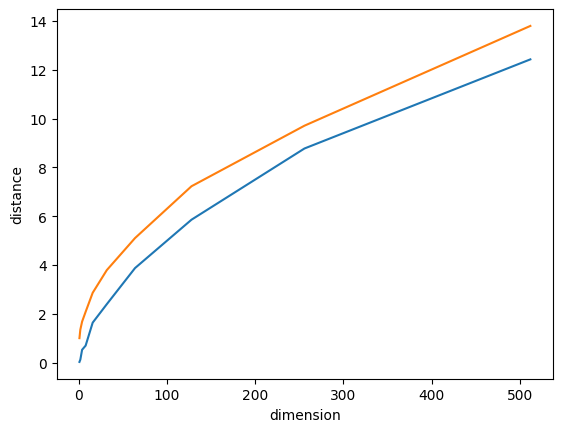

In [1]:
import numpy as np
import matplotlib.pyplot as plt

size = 100
dimensions = 2**np.arange(10)
d_min, d_max = [], []

for dim in dimensions:
    x = np.random.uniform(size = (size, dim), low = -1, high = 1)
    dist = np.sqrt((x**2).sum(axis = 1))
    d_min.append(dist.min())
    d_max.append(dist.max())
    
plt.plot(dimensions, d_min)
plt.plot(dimensions, d_max)
plt.xlabel("dimension")
plt.ylabel("distance")
plt.show()

## D　クラスタリングの評価

In [ ]:
# デモデータの生成
cluster_0 = np.random.multivariate_normal([-2, -2], [[1, 0], [0, 1]], 100)
cluster_1 = np.random.multivariate_normal([2, 2], [[1, 0], [0, 1]], 100)
X = np.r_[cluster_0, cluster_1]
 
# 散布図
plt.scatter(X[:,0], X[:,1])
plt.show()

### エルボー図
k-means法のクラスタ数を検討するためのプロットです。横軸にクラスタ数，縦軸は損失関数$$L(C_1,\cdots,C_K) = \sum_{k=1}^{n}\sum_{i\in C_k}||x_i-\bar{x}_k||^2$$の値をプロットしています。

損失関数の値が下げ止まる直前のクラスタ数が望ましいクラスタ数であると考えられます。
これは折れ線グラフがくの字に折れ曲がるところをクラスタ数として採用することと同じです。

In [ ]:
inertia = []

for i  in range(1,11):
    km = KMeans(n_clusters=i,max_iter=300)
    km.fit(X)                         
    inertia.append(km.inertia_)  

plt.plot(range(1,11),inertia,marker='o')
plt.show()

### シルエットプロット
各データポイントごとにシルエット係数と呼ばれる数値を計算し，棒グラフでプロットしたものをシルエットプロットといいます。
シルエット係数は凝集度と乖離度と呼ばれる値を用いて計算されます。各値の求め方は次の通りです。

 * 凝集度 = 同じクラスターに属する点との距離の平均値(小さいほうが望ましい)
 * 乖離度 = 次に近いクラスターに属している点との距離の平均値(大きいほうが望ましい)
 * シルエット係数 = (乖離度-凝集度)/max(乖離度,凝集度)
 
シルエット係数の分母はシルエット係数が1以下の値をとるように調整するためのものです。凸状のクラスターを作るとは限らない手法に対しては適切な評価が与えられません．

In [ ]:
km = KMeans(n_clusters = 2,max_iter=300)
km.fit(X)
pred = km.predict(X)

In [ ]:
from silhouette import silhouette_visualizer

silhouette_visualizer(X, pred)

## E　デモ

各国の乳製品の消費量のデータを持ちいて、消費量による国のクラスタリングをやってみましょう。

In [2]:
import pandas as pd
data = pd.read_csv("./data/dairy_products.csv")
data.head(n = 5)

,country,butter,milk,cheese
0,中国,0.1,20.3,0.1
1,日本,0.6,30.8,2.4
2,韓国,0.2,32.9,2.8
3,イラン,1.0,27.1,4.7
4,トルコ,0.9,17.8,7.8


In [3]:
data.describe()

,butter,milk,cheese
count,46.000000,46.000000,46.000000
mean,2.576087,56.641304,13.293478
std,1.953024,29.652203,8.526518
min,0.100000,9.100000,0.100000
25%,0.925000,33.275000,4.950000
50%,2.300000,49.600000,13.300000
75%,3.675000,77.650000,19.950000
max,8.200000,125.000000,28.100000


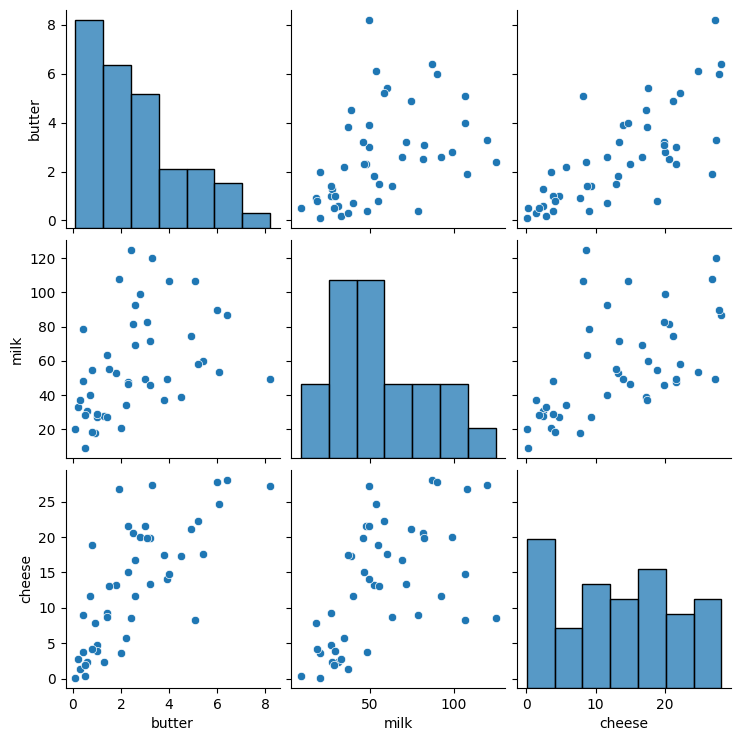

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data)
plt.show()

In [22]:
# 入力の2次元配列を作る。
X = data.drop("country", axis = 1).values
X.shape

(46, 4)

In [8]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# X.mean(axis = 0)

array([ 1.68946982e-16,  2.31698718e-16, -3.37893964e-16])

In [9]:
# X.std(axis = 0)

array([1., 1., 1.])

In [23]:
# kmeans法のインスタンスを建てる
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
cluster = kmeans.predict(X)
cluster

array([2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 2, 2,
       1, 1], dtype=int32)

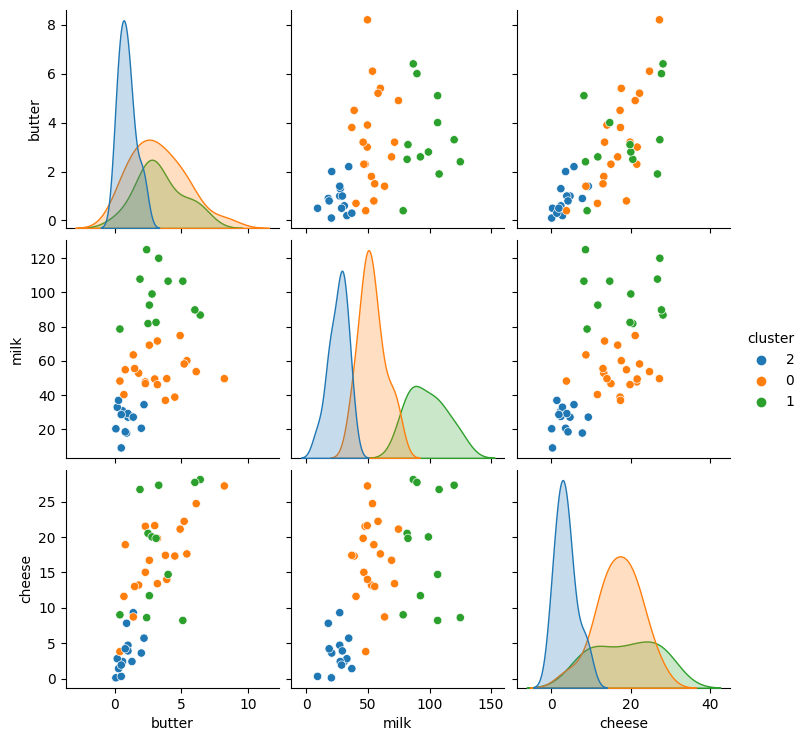

In [24]:
data = data.assign(cluster = cluster)
data["cluster"] = data["cluster"].astype("str")    # cluster列を数値から文字列にcast
sns.pairplot(data, hue = "cluster")
plt.show()

In [21]:
# 各クラスターの様子を確認してみよう
data.query('cluster == "3"')

,country,butter,milk,cheese,cluster
5,イスラエル,0.8,54.8,18.9,3
10,スペイン,0.4,78.6,9.0,3
12,イタリア,2.3,47.7,21.5,3
13,ポーランド,4.5,38.8,17.3,3
15,オランダ,3.0,49.4,21.6,3
20,ベルギー,2.3,46.7,15.0,3
22,ハンガリー,1.8,52.8,13.2,3
23,スロバキア,3.9,49.6,14.0,3
24,ラトビア,3.2,46.1,19.8,3
26,リトアニア,3.8,36.9,17.4,3


[問題]　クラスターを解釈してみましょう。またクラスターの解釈から、このk-means法の分析の流れには重要な計算が抜けていることに気づくことができるでしょうか。考えてみてください。

[解答]　クラスターはミルクの消費量の違いでほとんど決まっています。ミルクの標準偏差は他の変数よりとても大きいため、変数の標準化を施さなかったためにこのような現象が発生しています。では、標準化をしたらどのような結果になるのか改めて確認してみてください。